In [1]:
# Manpulate
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer # text feature

# Pre-Processing
from sklearn.preprocessing import StandardScaler # Scaling

# similarity metric
from sklearn.metrics.pairwise import cosine_similarity

import warnings

warnings.filterwarnings('ignore')

# Data Understanding & Preparation

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df = pd.merge(credits,movies,left_on='movie_id',right_on='id',how='inner')
df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   id                    4803 non-null   int64  
 8   keywords              4803 non-null   object 
 9   original_language     4803 non-null   object 
 10  original_title        4803 non-null   object 
 11  overview              4800 non-null   object 
 12  popularity            4803 non-null   float64
 13  production_companies  4803 non-null   object 
 14  production_countries  4803 non-null   object 
 15  release_date         

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'],errors='coerce')

In [8]:
# unuseful columns
df.drop(['title_x','homepage','id','original_language','production_companies','production_countries','spoken_languages','status','title_y'],axis=1,inplace=True)

In [9]:
df.head()

,movie_id,cast,crew,budget,genres,keywords,original_title,overview,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124


In [10]:
# extract actors from cast ---> name
# extract geners from geners ---> name
# extract keywords from keywords ---> name
# extract directors from crew ---> name for job == Director

In [11]:
df['cast'].iloc[1]

'[{"cast_id": 4, "character": "Captain Jack Sparrow", "credit_id": "52fe4232c3a36847f800b50d", "gender": 2, "id": 85, "name": "Johnny Depp", "order": 0}, {"cast_id": 5, "character": "Will Turner", "credit_id": "52fe4232c3a36847f800b511", "gender": 2, "id": 114, "name": "Orlando Bloom", "order": 1}, {"cast_id": 6, "character": "Elizabeth Swann", "credit_id": "52fe4232c3a36847f800b515", "gender": 1, "id": 116, "name": "Keira Knightley", "order": 2}, {"cast_id": 12, "character": "William \\"Bootstrap Bill\\" Turner", "credit_id": "52fe4232c3a36847f800b52d", "gender": 2, "id": 1640, "name": "Stellan Skarsg\\u00e5rd", "order": 3}, {"cast_id": 10, "character": "Captain Sao Feng", "credit_id": "52fe4232c3a36847f800b525", "gender": 2, "id": 1619, "name": "Chow Yun-fat", "order": 4}, {"cast_id": 9, "character": "Captain Davy Jones", "credit_id": "52fe4232c3a36847f800b521", "gender": 2, "id": 2440, "name": "Bill Nighy", "order": 5}, {"cast_id": 7, "character": "Captain Hector Barbossa", "credit_

In [12]:
import ast
l = ast.literal_eval(df['cast'].iloc[1]) if pd.notnull(df['cast'].iloc[1]) else []
[l[i]['name'] for i in range(10)]

['Johnny Depp',
 'Orlando Bloom',
 'Keira Knightley',
 'Stellan Skarsgård',
 'Chow Yun-fat',
 'Bill Nighy',
 'Geoffrey Rush',
 'Jack Davenport',
 'Kevin McNally',
 'Tom Hollander']

In [13]:
import ast  # ast.literal_eval() to convert string representation of list/dict to actual list/dict

def extract_names(row):
    l = ast.literal_eval(row) if pd.notnull(row) else []
    try:
        res = [l[i]['name'].replace(' ','_') for i in range(10)]
    except:
        res = [i['name'].replace(' ','_') for i in l]
    return ' '.join(res)

def extract_director(row):
    l = ast.literal_eval(row) if pd.notnull(row) else []
    for member in l:
        if member.get('job') == 'Director':
            return member.get('name').replace(' ','_')
    return None

df['actors'] = df['cast'].apply(extract_names)
df['genres'] = df['genres'].apply(extract_names)
df['keywords'] = df['keywords'].apply(extract_names)
df['director'] = df['crew'].apply(extract_director)

In [14]:
df.drop(['cast','crew'],axis=1,inplace=True)

In [15]:
df.head()

,movie_id,budget,genres,keywords,original_title,overview,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,actors,director
0,19995,237000000,Action Adventure Fantasy Science_Fiction,culture_clash future space_war space_colony so...,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,Sam_Worthington Zoe_Saldana Sigourney_Weaver S...,James_Cameron
1,285,300000000,Adventure Fantasy Action,ocean drug_abuse exotic_island east_india_trad...,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,Johnny_Depp Orlando_Bloom Keira_Knightley Stel...,Gore_Verbinski
2,206647,245000000,Action Adventure Crime,spy based_on_novel secret_agent sequel mi6 bri...,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,Daniel_Craig Christoph_Waltz Léa_Seydoux Ralph...,Sam_Mendes
3,49026,250000000,Action Crime Drama Thriller,dc_comics crime_fighter terrorist secret_ident...,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,Christian_Bale Michael_Caine Gary_Oldman Anne_...,Christopher_Nolan
4,49529,260000000,Action Adventure Science_Fiction,based_on_novel mars medallion space_travel pri...,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,Taylor_Kitsch Lynn_Collins Samantha_Morton Wil...,Andrew_Stanton


In [16]:
df.isna().sum()

movie_id            0
budget              0
genres              0
keywords            0
original_title      0
overview            3
popularity          0
release_date        1
revenue             0
runtime             2
tagline           844
vote_average        0
vote_count          0
actors              0
director           30
dtype: int64

In [17]:
df['overview'].fillna('',inplace=True)
df['tagline'].fillna('',inplace=True)
df['director'].fillna('',inplace=True)

df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [18]:
df.isna().sum()

movie_id          0
budget            0
genres            0
keywords          0
original_title    0
overview          0
popularity        0
release_date      0
revenue           0
runtime           0
tagline           0
vote_average      0
vote_count        0
actors            0
director          0
dtype: int64

In [19]:
df['combined'] = df[['genres', 'director', 'keywords', 'actors', 'overview', 'tagline']].agg(' '.join, axis=1)
df.drop(['genres', 'director', 'keywords', 'actors', 'overview', 'tagline'],axis=1,inplace=True)

In [20]:
df.head()

,movie_id,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,combined
0,19995,237000000,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,11800,Action Adventure Fantasy Science_Fiction James...
1,285,300000000,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9,4500,Adventure Fantasy Action Gore_Verbinski ocean ...
2,206647,245000000,Spectre,107.376788,2015-10-26,880674609,148.0,6.3,4466,Action Adventure Crime Sam_Mendes spy based_on...
3,49026,250000000,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6,9106,Action Crime Drama Thriller Christopher_Nolan ...
4,49529,260000000,John Carter,43.926995,2012-03-07,284139100,132.0,6.1,2124,Action Adventure Science_Fiction Andrew_Stanto...


# EDA

In [21]:
px.histogram(x=df['budget'])

In [22]:
px.histogram(df['revenue'])

In [23]:
px.histogram(df['runtime'])

In [24]:
px.histogram(df['popularity'])

In [25]:
px.histogram(df['vote_average'])

In [26]:
px.histogram(df['vote_count'])

<Axes: >

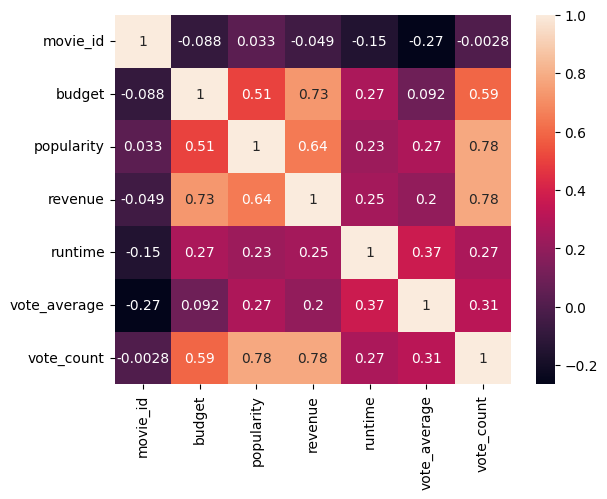

In [27]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

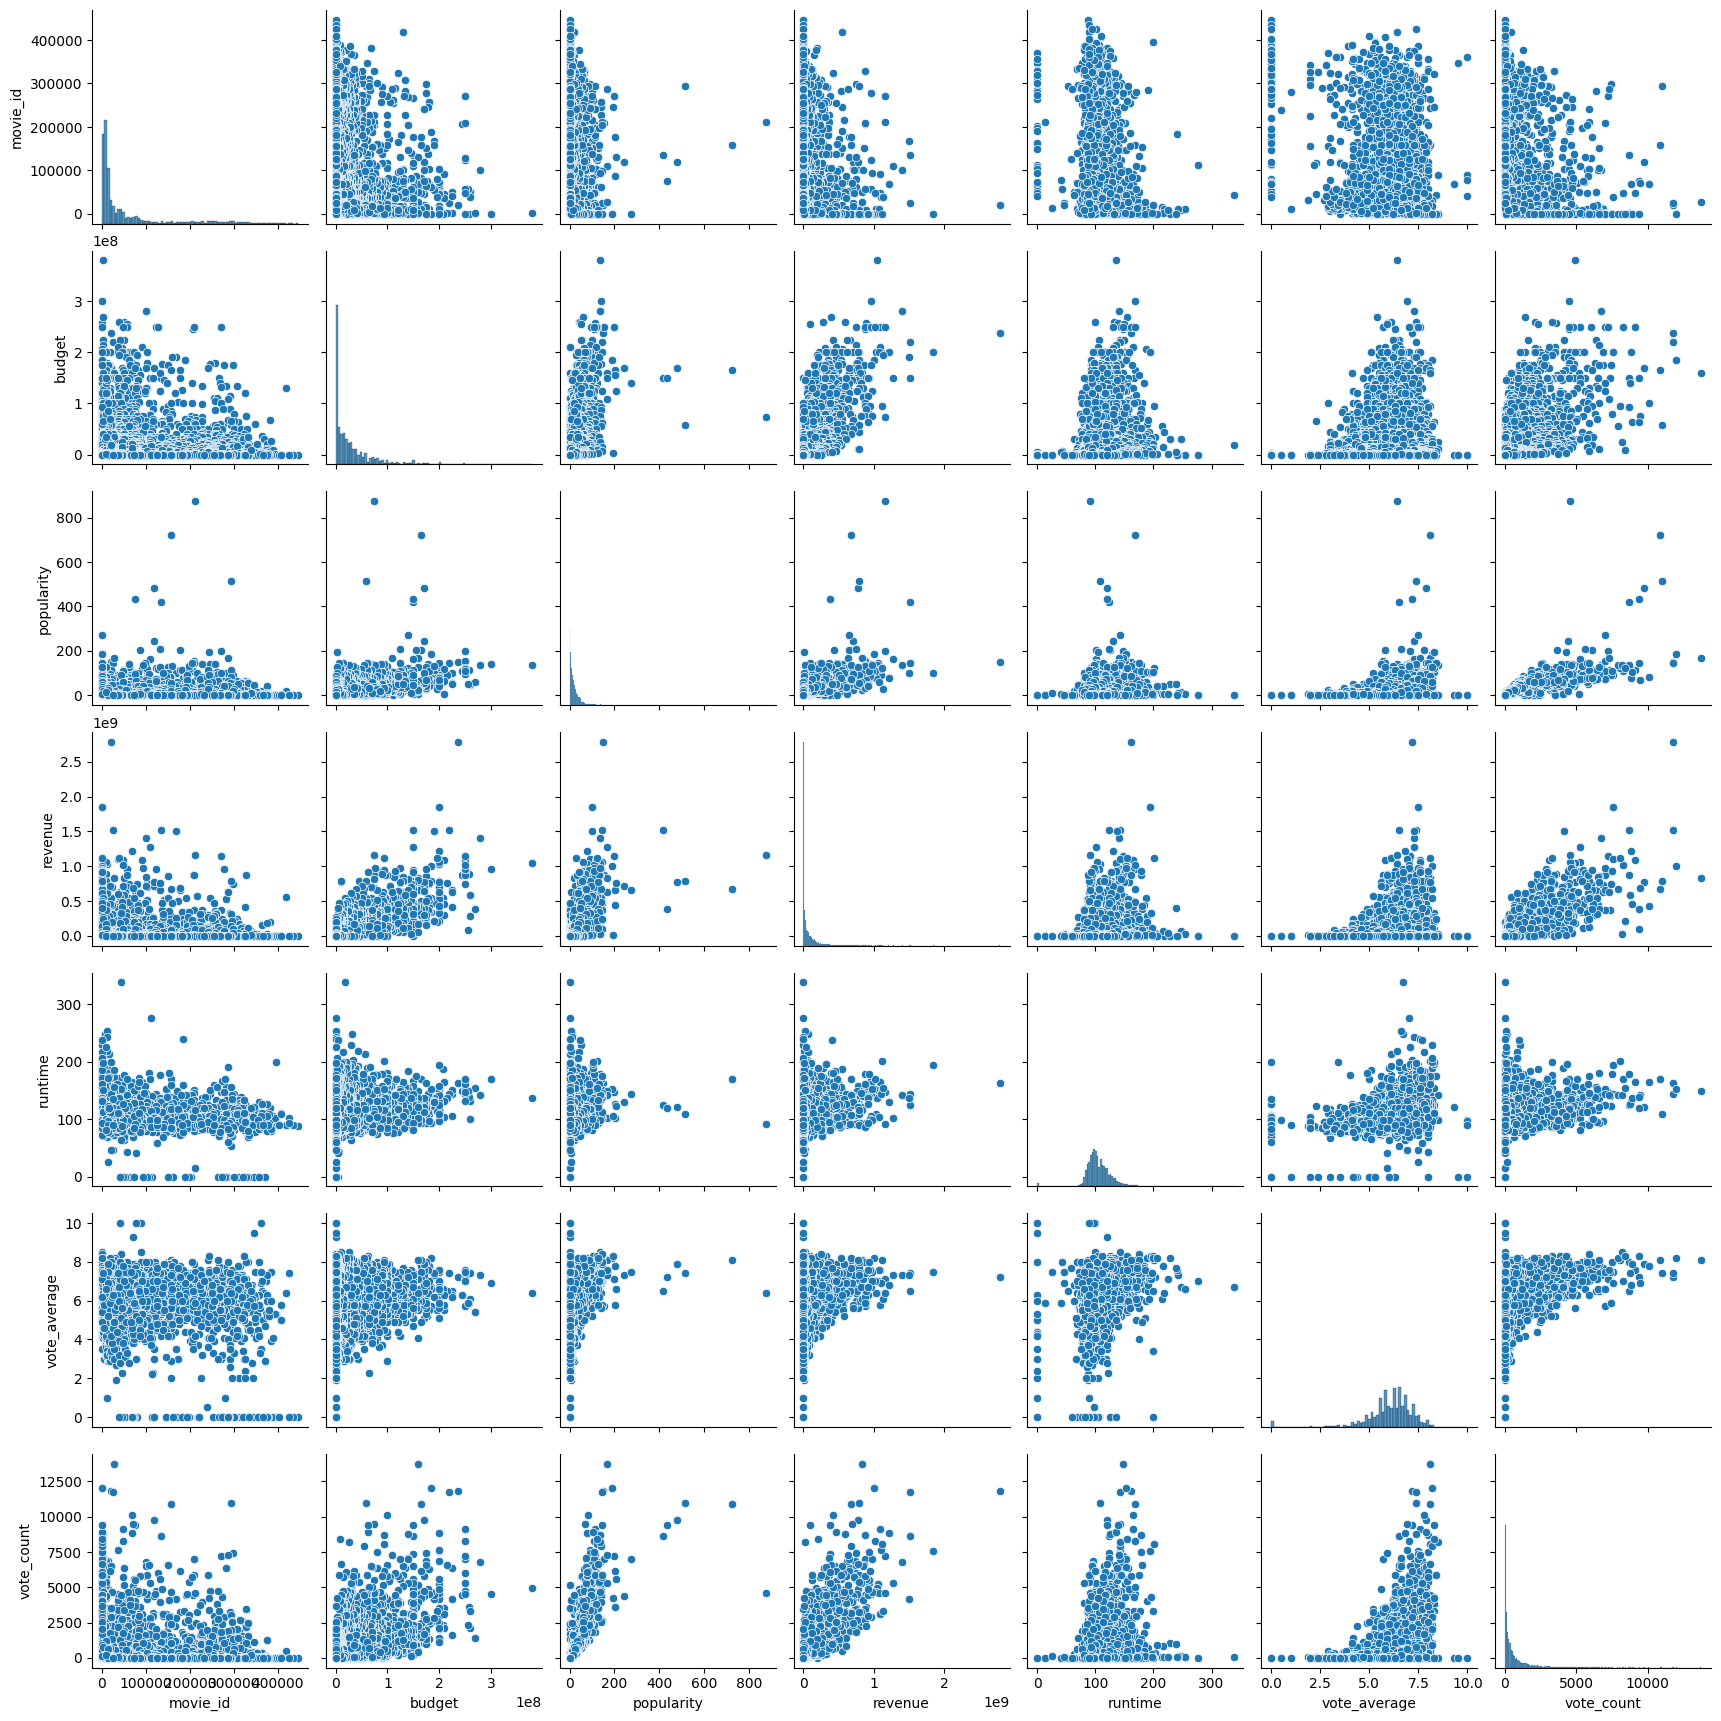

In [28]:
sns.pairplot(df)

In [29]:
df.duplicated().sum()

0

# Discover The Top 20 Movies
* 1) Using Popularity or Vote Average (not accurate)
* 2) Using Weighted Rating (accurate)
* 3) Using Combination of Weighted Rating and Popularity (more accurate)

In [30]:
# The Important Features For Top 20 Movies
top_df = df[['original_title','vote_average','vote_count','popularity']]
top_df

,original_title,vote_average,vote_count,popularity
0,Avatar,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End,6.9,4500,139.082615
2,Spectre,6.3,4466,107.376788
3,The Dark Knight Rises,7.6,9106,112.312950
4,John Carter,6.1,2124,43.926995
...,...,...,...,...
4795,El Mariachi,6.6,238,14.269792
4796,Newlyweds,5.9,5,0.642552
4797,"Signed, Sealed, Delivered",7.0,6,1.444476
4798,Shanghai Calling,5.7,7,0.857008


In [31]:
top_df.describe()

,vote_average,vote_count,popularity
count,4800.000000,4800.000000,4800.000000
mean,6.094458,690.646875,21.505569
std,1.188366,1234.852449,31.822163
min,0.000000,0.000000,0.000372
25%,5.600000,54.000000,4.682212
50%,6.200000,236.000000,12.928897
75%,6.800000,737.250000,28.350628
max,10.000000,13752.000000,875.581305


###  1) Using Popularity or Vote Average (not accurate)

In [32]:
# note: 
## minions has a high popularity but it has a low rating ---> so its not accurate to set it as the first movie
## so we don't accept the popularity
top_df.sort_values(by='popularity',ascending=False).head(20)

,original_title,vote_average,vote_count,popularity
546,Minions,6.4,4571,875.581305
95,Interstellar,8.1,10867,724.247784
788,Deadpool,7.4,10995,514.569956
94,Guardians of the Galaxy,7.9,9742,481.098624
127,Mad Max: Fury Road,7.2,9427,434.278564
28,Jurassic World,6.5,8662,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,271.972889
82,Dawn of the Planet of the Apes,7.3,4410,243.791743
200,The Hunger Games: Mockingjay - Part 1,6.6,5584,206.227151
88,Big Hero 6,7.8,6135,203.734590


In [33]:
# note:
## there are films with high rating, but a few people are voted 
## one person vote ---> 10 rate
## i can't set that as the top movie 
## so we don't accept the vote_average
top_df.sort_values(by='vote_average',ascending=False).head(20)

,original_title,vote_average,vote_count,popularity
4245,Me You and Five Bucks,10.0,2,0.094105
4659,Little Big Top,10.0,1,0.092100
4044,"Dancer, Texas Pop. 81",10.0,1,0.376662
3518,Stiff Upper Lips,10.0,1,0.356495
3991,Sardaarji,9.5,2,0.296981
2386,One Man's Hero,9.3,2,0.910529
1881,The Shawshank Redemption,8.5,8205,136.747729
2969,There Goes My Baby,8.5,2,0.037073
3336,The Godfather,8.4,5893,143.659698
2795,The Prisoner of Zenda,8.4,11,4.021389


### 2) Using Weighted Rating (accurate)

**The weighted rating** is a formula that combines a movie's average rating and the number of votes it received to give a more balanced score—giving more importance to movies with more votes so they’re not unfairly rated high or low just because of a small number of reviews.

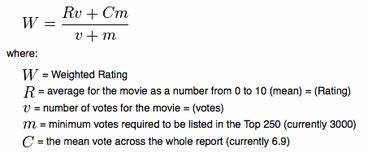

In [34]:
R = top_df['vote_average']
v = top_df['vote_count']
m = top_df['vote_count'].quantile(0.95)
C = top_df['vote_average'].mean()

top_df['weighted_rating'] = (R * v + C * m) / (v + m)

In [35]:
# note:
## weighted_rating cause balance between vote_average and vote_count
## this made the arrangement logical and accurate
## but it still hasn't taken popularity into account
top_df.sort_values(by='weighted_rating',ascending=False).head(20)

,original_title,vote_average,vote_count,popularity,weighted_rating
1881,The Shawshank Redemption,8.5,8205,136.747729,7.849493
65,The Dark Knight,8.2,12002,187.322927,7.774334
662,Fight Club,8.3,9413,146.757391,7.761427
96,Inception,8.1,13752,167.583710,7.736802
3231,Pulp Fiction,8.3,8428,121.463076,7.715173
95,Interstellar,8.1,10867,724.247784,7.661464
809,Forrest Gump,8.2,7927,138.133331,7.616187
3336,The Godfather,8.4,5893,143.659698,7.615194
329,The Lord of the Rings: The Return of the King,8.1,8064,123.630332,7.550775
262,The Lord of the Rings: The Fellowship of the Ring,8.0,8705,138.049577,7.506638


### 3) Using Combination of Weighted Rating and Popularity (more accurate)

Score = W0 * Weighted Rating  +  W1 * Popularity

W0,W1 ---> weights we set it to give importance to feature, but in this case we will set the importance 50%-50% 
because we want to consider both equally

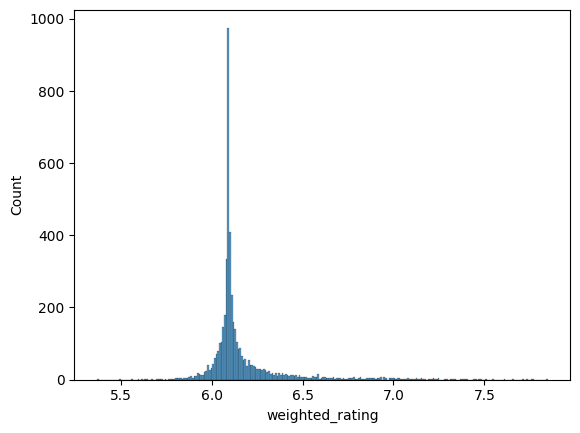

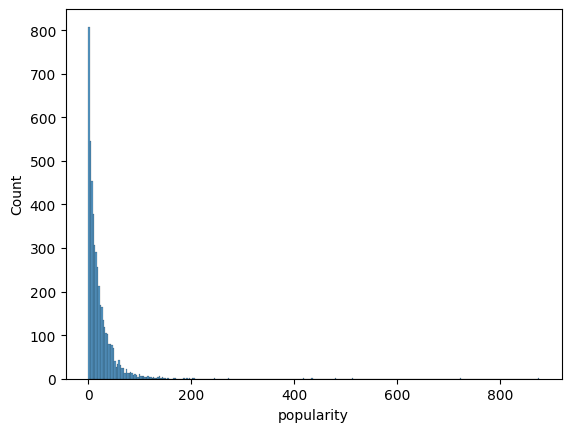

In [36]:
# at the first we must make them in the same scale
# so we want to show the distibution to judge
sns.histplot(top_df['weighted_rating'])
plt.show()
sns.histplot(top_df['popularity'])
plt.show()

<Axes: xlabel='popularity', ylabel='Count'>

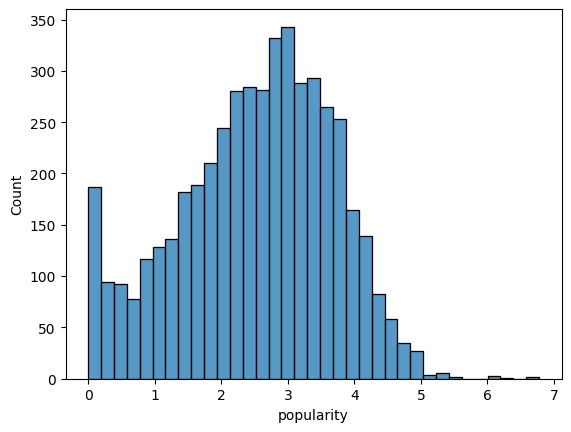

In [37]:
# we notice the popularity is right skewed so we will use Log
# we use (np.log1p) because its contain zero
sns.histplot(np.log1p(top_df['popularity']))

In [38]:
# now both of them is normal distributed so we will use Standard Scaler

top_df['popularity_loged'] = np.log1p(top_df['popularity'])

scaler = StandardScaler()

top_df[['popularity_scaled','weighted_rating_scaled']] = scaler.fit_transform(top_df[['popularity_loged','weighted_rating']])

top_df['score'] = 0.5 * top_df['popularity_scaled'] + 0.5 * top_df['weighted_rating_scaled']

In [39]:
# note:
## its more accurate arrangement because it considers 'vote_average','vote_count','popularity'
top_20_movies = top_df[['original_title','vote_average','vote_count','popularity', 'score']].sort_values(by='score',ascending=False).head(20)
top_20_movies

,original_title,vote_average,vote_count,popularity,score
95,Interstellar,8.1,10867,724.247784,5.169043
1881,The Shawshank Redemption,8.5,8205,136.747729,4.881833
65,The Dark Knight,8.2,12002,187.322927,4.845237
96,Inception,8.1,13752,167.583710,4.711916
662,Fight Club,8.3,9413,146.757391,4.711235
94,Guardians of the Galaxy,7.9,9742,481.098624,4.557410
3231,Pulp Fiction,8.3,8428,121.463076,4.524818
3336,The Godfather,8.4,5893,143.659698,4.368616
809,Forrest Gump,8.2,7927,138.133331,4.354091
329,The Lord of the Rings: The Return of the King,8.1,8064,123.630332,4.157467


# Content Base Recommendation System

A **Content-Based Recommendation System** suggests items to a user by analyzing the features of items they have liked before and recommending similar items based on those features.

In [40]:
content_df = df[['original_title','vote_average','vote_count','combined']]
content_df

,original_title,vote_average,vote_count,combined
0,Avatar,7.2,11800,Action Adventure Fantasy Science_Fiction James...
1,Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action Gore_Verbinski ocean ...
2,Spectre,6.3,4466,Action Adventure Crime Sam_Mendes spy based_on...
3,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller Christopher_Nolan ...
4,John Carter,6.1,2124,Action Adventure Science_Fiction Andrew_Stanto...
...,...,...,...,...
4795,El Mariachi,6.6,238,Action Crime Thriller Robert_Rodriguez united_...
4796,Newlyweds,5.9,5,Comedy Romance Edward_Burns Edward_Burns Kerr...
4797,"Signed, Sealed, Delivered",7.0,6,Comedy Drama Romance TV_Movie Scott_Smith date...
4798,Shanghai Calling,5.7,7,Daniel_Hsia Daniel_Henney Eliza_Coupe Bill_P...


In [41]:
tf_idf_vectorizer = TfidfVectorizer(lowercase=True,analyzer='word',stop_words='english',ngram_range=(1,1))
tf_idf_matrix = tf_idf_vectorizer.fit_transform(content_df['combined'])

content_similarity = cosine_similarity(tf_idf_matrix, tf_idf_matrix)
content_similarity

array([[1.        , 0.02359841, 0.00697217, ..., 0.00716492, 0.00321228,
        0.        ],
       [0.02359841, 1.        , 0.01150239, ..., 0.0138004 , 0.00946047,
        0.        ],
       [0.00697217, 0.01150239, 1.        , ..., 0.00836997, 0.        ,
        0.        ],
       ...,
       [0.00716492, 0.0138004 , 0.00836997, ..., 1.        , 0.01357822,
        0.01629389],
       [0.00321228, 0.00946047, 0.        , ..., 0.01357822, 1.        ,
        0.01098625],
       [0.        , 0.        , 0.        , ..., 0.01629389, 0.01098625,
        1.        ]])

In [42]:
title_to_index_df = pd.DataFrame(content_df.index, index=content_df['original_title'])
title_to_index_df

,0
original_title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4795
Newlyweds,4796
"Signed, Sealed, Delivered",4797


In [43]:
movie_name = 'The Godfather'
movie_index = title_to_index_df.loc[movie_name]
scores = list(enumerate(content_similarity[movie_index][0])) # to save the indices of similarty score
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
simalrity_indices = [e[0] for e in sorted_scores]
simalrity_values = [e[1] for e in sorted_scores]

result = content_df.copy()
result['simalrity'] = 0
result.iloc[simalrity_indices, 4] = simalrity_values
result.iloc[simalrity_indices][result['vote_count'] > 100].head(10)

,original_title,vote_average,vote_count,combined,simalrity
3336,The Godfather,8.4,5893,Drama Crime Francis_Ford_Coppola italy love_at...,1.000000
2730,The Godfather: Part II,8.3,3338,Drama Crime Francis_Ford_Coppola italo-america...,0.292305
867,The Godfather: Part III,7.1,1546,Crime Drama Thriller Francis_Ford_Coppola ital...,0.188042
1873,Blood Ties,6.0,171,Thriller Crime Drama Guillaume_Canet Clive_Ow...,0.116223
1225,Mickey Blue Eyes,5.3,140,Comedy Crime Romance Kelly_Makin new_york marr...,0.091747
2038,Summer of Sam,6.3,112,Thriller Drama Crime Romance Spike_Lee distrus...,0.076597
2260,All Good Things,5.9,286,Drama Mystery Thriller Crime Romance Andrew_Ja...,0.068539
2691,Thinner,5.5,124,Horror Thriller Tom_Holland blow_job curse fat...,0.065113
1394,Donnie Brasco,7.4,1147,Crime Drama Thriller Mike_Newell undercover co...,0.061052
3475,City Island,6.9,113,Drama Comedy Raymond_De_Felitta secret fetishi...,0.060077
